In [42]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

In [26]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [5]:
len(x_train)

50000

In [6]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
x_test.shape

(10000, 32, 32, 3)

In [8]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [9]:
plt.gray()

<Figure size 640x480 with 0 Axes>

In [32]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])    

In [19]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [27]:
y_train.shape

(50000, 1)

In [28]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [29]:
y_train=y_train.reshape(-1,)

In [30]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [31]:
classes[9]

'truck'

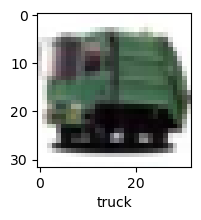

In [36]:
plot_sample(x_train,y_train,202)

In [37]:
x_train[0]/255

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [38]:
x_train=x_train/255

In [39]:
x_test=x_test/255

In [44]:
ann_model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation="relu"),
    keras.layers.Dense(1000,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
    
])

In [46]:
ann_model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",
                 metrics=(["accuracy"]))

In [57]:
cnn_model=keras.Sequential([
    keras.layers.Conv2D(filters=32,activation="relu",kernel_size=(3,3),input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters=64,activation="relu",kernel_size=(3,3)),
    keras.layers.MaxPooling2D((2,2)),
    
    #dense
    keras.layers.Flatten(),
    keras.layers.Dense(1000,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
    
])

In [58]:
cnn_model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=(["accuracy"]))

In [59]:
cnn_model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 87s 55ms/step - loss: 1.3251 - accuracy: 0.5250
Epoch 2/10
1563/1563 [==============================] - 85s 54ms/step - loss: 0.9497 - accuracy: 0.6664
Epoch 3/10
1563/1563 [==============================] - 87s 56ms/step - loss: 0.7571 - accuracy: 0.7346
Epoch 4/10
1563/1563 [==============================] - 85s 54ms/step - loss: 0.5780 - accuracy: 0.7992
Epoch 5/10
1563/1563 [==============================] - 86s 55ms/step - loss: 0.4185 - accuracy: 0.8542
Epoch 6/10
1563/1563 [==============================] - 87s 56ms/step - loss: 0.2733 - accuracy: 0.9048
Epoch 7/10
1563/1563 [==============================] - 89s 57ms/step - loss: 0.1748 - accuracy: 0.9404
Epoch 8/10
1563/1563 [==============================] - 89s 57ms/step - loss: 0.1279 - accuracy: 0.9566
Epoch 9/10
1563/1563 [==============================] - 89s 57ms/step - loss: 0.0971 - accuracy: 0.9668
Epoch 10/10
1563/1563 [==============================] - 87s 56m

In [60]:

cnn_model.evaluate(x_test,y_test)

313/313 [==============================] - 6s 17ms/step - loss: 1.6251 - accuracy: 0.7009


[1.6251347064971924, 0.7009000182151794]

In [61]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [62]:
y_pred=cnn_model.predict(x_test)

313/313 [==============================] - 5s 16ms/step


In [63]:
y_pred[0]

array([1.9619040e-06, 1.0390471e-03, 7.9155125e-06, 4.8327121e-01,
       7.0102346e-06, 5.1550007e-01, 2.6195930e-06, 5.9447251e-07,
       1.6941618e-04, 1.8521153e-07], dtype=float32)

In [68]:
y_pred_classes=[np.argmax(element) for element in y_pred]

In [69]:
y_pred_classes

[5,
 8,
 8,
 0,
 4,
 6,
 1,
 2,
 3,
 1,
 2,
 9,
 1,
 7,
 1,
 8,
 5,
 7,
 8,
 6,
 7,
 2,
 2,
 9,
 4,
 2,
 4,
 0,
 7,
 6,
 6,
 5,
 4,
 5,
 9,
 1,
 4,
 0,
 9,
 5,
 4,
 6,
 3,
 6,
 0,
 9,
 3,
 7,
 7,
 6,
 9,
 8,
 6,
 3,
 8,
 8,
 5,
 5,
 5,
 6,
 7,
 5,
 6,
 3,
 5,
 2,
 8,
 2,
 3,
 2,
 2,
 3,
 8,
 8,
 0,
 2,
 0,
 3,
 3,
 8,
 0,
 1,
 1,
 7,
 2,
 7,
 2,
 4,
 8,
 9,
 0,
 5,
 8,
 6,
 4,
 6,
 6,
 0,
 0,
 7,
 5,
 5,
 6,
 3,
 1,
 1,
 2,
 6,
 7,
 7,
 4,
 0,
 6,
 2,
 9,
 4,
 0,
 4,
 6,
 5,
 8,
 3,
 1,
 2,
 8,
 0,
 8,
 3,
 1,
 2,
 4,
 1,
 8,
 9,
 1,
 3,
 9,
 7,
 2,
 8,
 3,
 5,
 3,
 3,
 8,
 7,
 6,
 6,
 5,
 5,
 8,
 1,
 6,
 0,
 0,
 5,
 2,
 9,
 3,
 4,
 2,
 1,
 6,
 6,
 8,
 2,
 8,
 4,
 5,
 0,
 9,
 9,
 0,
 8,
 9,
 9,
 3,
 7,
 3,
 0,
 8,
 5,
 6,
 6,
 0,
 8,
 3,
 2,
 3,
 8,
 5,
 8,
 7,
 1,
 7,
 6,
 8,
 8,
 5,
 3,
 5,
 0,
 8,
 7,
 1,
 3,
 0,
 5,
 7,
 9,
 5,
 0,
 5,
 9,
 8,
 0,
 4,
 9,
 8,
 2,
 4,
 6,
 9,
 4,
 4,
 1,
 4,
 0,
 3,
 6,
 3,
 1,
 5,
 8,
 8,
 0,
 4,
 9,
 3,
 2,
 1,
 1,
 1,
 0,
 0,
 6,
 1,
 8,
 2,
 0,


In [70]:
from sklearn.metrics import classification_report,confusion_matrix

In [71]:
y_test=y_test.reshape(-1)
cm=confusion_matrix(y_pred_classes,y_test)

In [72]:
cm

array([[773,  27,  61,  24,  28,  17,  10,  20,  65,  63],
       [ 20, 871,  15,  22,   8,  15,  18,  16,  45, 164],
       [ 53,   4, 575,  51,  71,  41,  42,  20,   6,   7],
       [ 14,   5,  59, 529,  62, 169,  58,  45,  21,  23],
       [ 20,   5,  77,  60, 639,  41,  23,  68,   8,   6],
       [ 10,  10,  92, 185,  72, 645,  21,  96,   8,  22],
       [ 10,  13,  77,  57,  52,  21, 797,  12,   8,  11],
       [ 10,   4,  13,  34,  48,  37,   5, 704,   5,  13],
       [ 72,  31,  26,  25,  16,   8,  19,   6, 825,  40],
       [ 18,  30,   5,  13,   4,   6,   7,  13,   9, 651]], dtype=int64)

import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmd="d")

Text(95.72222222222221, 0.5, 'Truth')

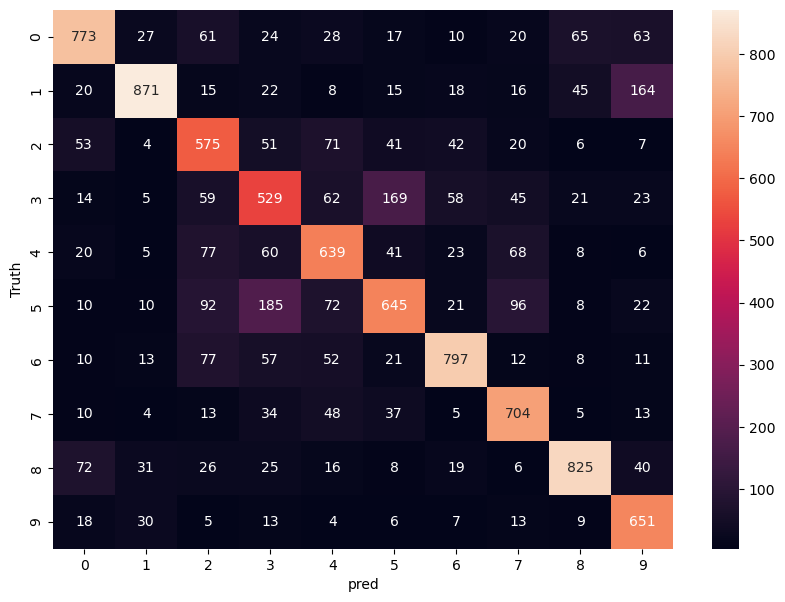

In [78]:
import seaborn as sn 
plt.figure(figsize=(10,7)) 
sn.heatmap(cm,annot=True,fmt="d")
plt.xlabel("pred")
plt.ylabel("Truth")

In [ ]:
cnn_model.predict(x_test)

195/313 [=================>............] - ETA: 1s

In [80]:
x_test[0]

array([[[0.61960784, 0.43921569, 0.19215686],
        [0.62352941, 0.43529412, 0.18431373],
        [0.64705882, 0.45490196, 0.2       ],
        ...,
        [0.5372549 , 0.37254902, 0.14117647],
        [0.49411765, 0.35686275, 0.14117647],
        [0.45490196, 0.33333333, 0.12941176]],

       [[0.59607843, 0.43921569, 0.2       ],
        [0.59215686, 0.43137255, 0.15686275],
        [0.62352941, 0.44705882, 0.17647059],
        ...,
        [0.53333333, 0.37254902, 0.12156863],
        [0.49019608, 0.35686275, 0.1254902 ],
        [0.46666667, 0.34509804, 0.13333333]],

       [[0.59215686, 0.43137255, 0.18431373],
        [0.59215686, 0.42745098, 0.12941176],
        [0.61960784, 0.43529412, 0.14117647],
        ...,
        [0.54509804, 0.38431373, 0.13333333],
        [0.50980392, 0.37254902, 0.13333333],
        [0.47058824, 0.34901961, 0.12941176]],

       ...,

       [[0.26666667, 0.48627451, 0.69411765],
        [0.16470588, 0.39215686, 0.58039216],
        [0.12156863, 0